In [1]:
import numpy as np

import cirq
from cirq.experiments import (
    random_rotations_between_grid_interaction_layers_circuit,
    GRID_STAGGERED_PATTERN,
)

In [27]:
qubits = [
    cirq.GridQubit(0, 0),
    cirq.GridQubit(1, 0),
]
two_qubit_op_factory = lambda a, b, _: cirq.FSimGate(theta=np.pi/2, phi=np.pi/6)(a, b)
pattern = GRID_STAGGERED_PATTERN # A B C D C D A B
single_qubit_gates = [
    cirq.X**0.5,
    cirq.Y**0.5,
    cirq.PhasedXPowGate(phase_exponent=0.25, exponent=0.5), # sqrt{W} gate
]
num_random_circuits = 10


In [28]:
random_circuit_gen = lambda: random_rotations_between_grid_interaction_layers_circuit(
    qubits=qubits,
    depth=4,
    two_qubit_op_factory=two_qubit_op_factory,
    pattern=pattern,
    single_qubit_gates=single_qubit_gates,
)

random_circuits = [
    random_circuit_gen()
    for _ in range(num_random_circuits)
]

In [29]:
random_circuits[0]

(0, 0): ───X^0.5───────────FSim(0.5π, 0.167π)───Y^0.5───X^0.5───Y^0.5───────────PhX(0.25)^0.5───
                           │
(1, 0): ───PhX(0.25)^0.5───FSim(0.5π, 0.167π)───Y^0.5───X^0.5───PhX(0.25)^0.5───X^0.5───────────

In [31]:
print(random_circuits[2])

(0, 0): ───PhX(0.25)^0.5───FSim(0.5π, 0.167π)───Y^0.5───PhX(0.25)^0.5───X^0.5───Y^0.5───────────
                           │
(1, 0): ───X^0.5───────────FSim(0.5π, 0.167π)───Y^0.5───PhX(0.25)^0.5───Y^0.5───PhX(0.25)^0.5───


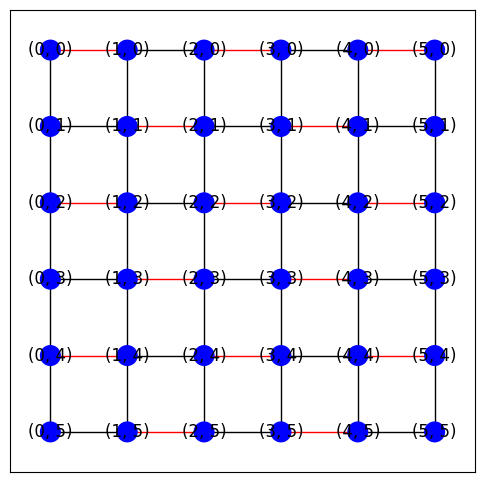

In [2]:
from utils import plot_grid_interaction_layer
from cirq.experiments import GridInteractionLayer
import cirq
gqs = cirq.GridQubit.rect(6, 6)
layer = GridInteractionLayer(col_offset=0, vertical=False, stagger=True)
plot_grid_interaction_layer(layer, gqs)